In [1]:
#     API Alpaca
#     Data cleanup
#     Consumer Discretionary Monte Carlo = XLY
#     Consumer Staples Monte Carlo = XLP
#     SP500 GROWTH Monte Carlo = SGX


In [2]:
#import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os
import seaborn as sns
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
APCA_API_KEY_ID = os.getenv("APCA_API_KEY")
APCA_SECRET_KEY = os.getenv("APCA_SECRET_KEY")

api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')
type(APCA_API_KEY_ID)


str

In [4]:
#Use alpha vantage to get historic quotes for XLY,XLP,IVW, and SPY. This goes back 20 years.

xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
xly_df.head()

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
#xlp_df.tail()

ivw_df = api.alpha_vantage.historic_quotes('IVW', adjusted=True, output_format='pandas')
#ivw_df.head()

spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [5]:
spy_df.head()


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-05-01,285.31,290.6572,281.52,282.79,282.79,125045778.0,0.0,1.0
2020-04-30,291.71,293.3239,288.59,290.48,290.48,121537052.0,0.0,1.0
2020-04-29,291.53,294.8800,290.41,293.21,293.21,118066585.0,0.0,1.0
2020-04-28,291.02,291.4000,285.40,285.73,285.73,104797847.0,0.0,1.0
2020-04-27,285.12,288.2700,284.62,287.05,287.05,77516422.0,0.0,1.0


In [6]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

ivw_df = ivw_df['5. adjusted close']
ivw_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xly_df, xlp_df, ivw_df, spy_df], axis = "columns", join = "inner")
concat_df.head()
    

,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [7]:
#print column names
print(concat_df.columns)


Index(['5. adjusted close', '5. adjusted close', '5. adjusted close',
       '5. adjusted close'],
      dtype='object')


In [8]:
#Change column names to avoid confusion
columns = ['XLY close', 'XLP close', 'IVW close', 'SPY close']
concat_df.columns = columns
concat_df.head()


,XLY close,XLP close,IVW close,SPY close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [9]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076
2000-05-30,20.5678,15.2091,64.1619,97.5894
2000-05-31,21.0571,15.0643,64.1619,97.8034
2000-06-01,21.2125,15.1021,64.9608,99.5155
2000-06-02,21.7950,14.5798,67.0988,101.2489


In [10]:
returns_df = concat_df.pct_change()
returns_df

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
...,...,...,...,...
2020-04-27,0.018708,0.002896,0.010027,0.014418
2020-04-28,0.003935,0.005605,-0.012140,-0.004599
2020-04-29,0.022038,-0.004222,0.031678,0.026179


In [11]:
#check for nulls

concat_df.isnull().sum()

XLY close    0
XLP close    0
IVW close    0
SPY close    0
dtype: int64

In [12]:
# Drop nulls
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLY close    0
XLP close    0
IVW close    0
SPY close    0
dtype: int64

In [13]:
# Checking for duplicate rows
concat_df.duplicated()

date
2000-05-26    False
2000-05-30    False
2000-05-31    False
2000-06-01    False
2000-06-02    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 5014, dtype: bool

In [14]:
# drop duplicates
concat_df.drop_duplicates(inplace=True)

In [15]:
concat_df.sort_index(inplace=True, ascending=True)

In [16]:
concat_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076
2000-05-30,20.5678,15.2091,64.1619,97.5894
2000-05-31,21.0571,15.0643,64.1619,97.8034
2000-06-01,21.2125,15.1021,64.9608,99.5155
2000-06-02,21.7950,14.5798,67.0988,101.2489


In [36]:
# drop close columns to create dataframe for daily returns
returns_df.rename(columns={'XLY close': 'XLY return',
                           'XLP close': 'XLP return',
                           'IVW close': 'IVW return',
                           'SP500 close': 'SP500 return'},
                  inplace=True)
returns_df.head()

,XLY return,XLP return,IVW return,SPY close
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418


In [37]:
#calculate value of standard deviation of daily returns
#use the std function to calculate the standard deviation of daily returns for XLY, XLP, & SGX

std_xly_daily_returns = concat_df['XLY close'].std()
std_xly_daily_returns

std_xlp_daily_returns = concat_df['XLP close'].std()
std_xlp_daily_returns

std_ivw_daily_returns = concat_df['IVW close'].std()
std_ivw_daily_returns

std_spy_daily_returns = concat_df['SPY close'].std()
std_spy_daily_returns

68.41583588099657

In [38]:
#calculate average of daily returns
avg_xly_daily_returns = concat_df['XLY close'].mean()
avg_xly_daily_returns

avg_xlp_daily_returns = concat_df['XLP close'].mean()
avg_xlp_daily_returns

avg_ivw_daily_returns = concat_df['IVW close'].mean()
avg_ivw_daily_returns

avg_spy_daily_returns = concat_df['SPY close'].mean()
avg_spy_daily_returns

137.12467668528132

In [39]:
#Check datatypes

concat_df.dtypes

XLY close    float64
XLP close    float64
IVW close    float64
SPY close    float64
dtype: object

In [40]:
#check counts
concat_df.count()

XLY close    5014
XLP close    5014
IVW close    5014
SPY close    5014
dtype: int64

In [41]:
#use describe to explore data
concat_df.describe()

,XLY close,XLP close,IVW close,SPY close
count,5014.000000,5014.000000,5014.000000,5014.000000
mean,47.009850,28.713785,77.484133,137.124677
std,30.625538,14.767077,42.836526,68.415836
min,13.621800,11.666100,30.552700,54.152900
25%,24.545100,16.248300,46.186250,87.139725
50%,31.384000,20.820850,57.318200,107.455500
75%,69.974175,42.698275,104.550500,184.717725
max,131.682600,64.409400,209.913000,336.274200


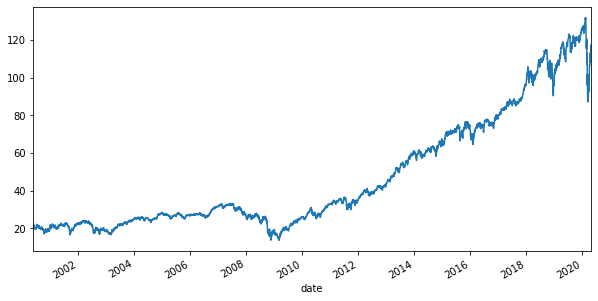

In [42]:
#plot daily returns of XLY

concat_df['XLY close'].plot(figsize=(10,5))

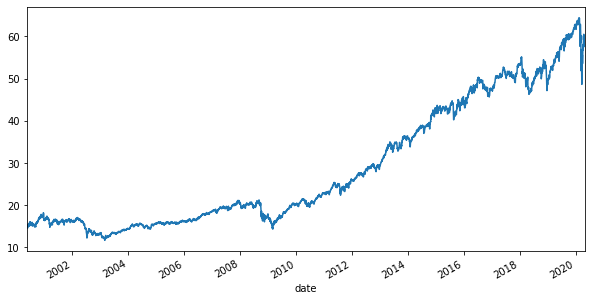

In [43]:
#plot daily returns of XLP

concat_df['XLP close'].plot(figsize=(10,5))

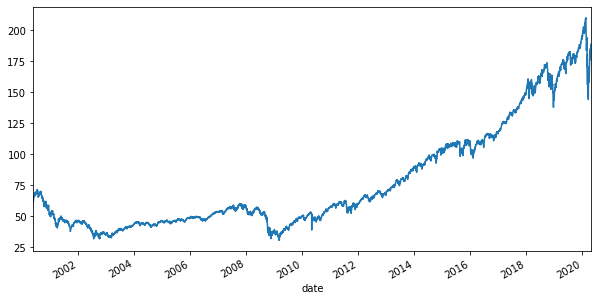

In [44]:
#plot daily returns of IVW

concat_df['IVW close'].plot(figsize=(10,5))

In [45]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_xly = (1 + concat_df['XLY close']).cumprod()
cumulative_returns_xlp = (1 + concat_df['XLP close']).cumprod()
cumulative_returns_ivw = (1 + concat_df['IVW close']).cumprod()
cumulative_returns_spy = (1 + concat_df['SPY close']).cumprod()

cumulative_returns_xly.head()

date
2000-05-26    2.141250e+01
2000-05-30    4.618205e+02
2000-05-31    1.018642e+04
2000-06-01    2.262659e+05
2000-06-02    5.157731e+06
Name: XLY close, dtype: float64

/Users/kellymaldonado/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2485: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta
/Users/kellymaldonado/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2485: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta
/Users/kellymaldonado/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:2485: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta


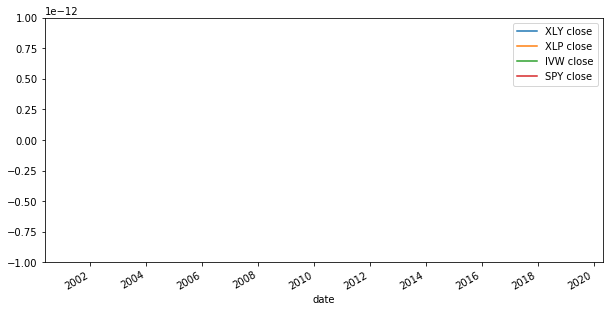

In [46]:
#plot cumulative returns

cumulative_returns_xly.plot(figsize=(10,5), legend=True)
cumulative_returns_xlp.plot(figsize=(10,5), legend=True)
cumulative_returns_ivw.plot(figsize=(10,5), legend=True)
cumulative_returns_spy.plot(figsize=(10,5), legend=True)

In [32]:
#need to check on dividend

In [35]:
# Calculate Sharpe Ratios for the sectors

XLY_sharpe_ratio = (concat_df['XLY close'].mean() * 252) / (concat_df['XLY close'].std() * np.sqrt(252))

XLP_sharpe_ratio = (concat_df['XLP close'].mean() * 252) / (concat_df['XLP close'].std() * np.sqrt(252))

IVW_sharpe_ratio = (concat_df['IVW close'].mean() * 252) / (concat_df['IVW close'].std() * np.sqrt(252))

SPY_sharpe_ratio = (concat_df['SPY close'].mean() * 252) / (concat_df['SPY close'].std() * np.sqrt(252))

print(f" XLY: {XLY_sharpe_ratio}, XLP: {XLP_sharpe_ratio}, IVW:{IVW_sharpe_ratio}, SPY:{SPY_sharpe_ratio}")




 XLY: 24.36718752405854, XLP: 30.867123726557065, IVW:28.714337991765657, SPY:31.8170015857539


In [96]:
concat_df.head()

,XLY close,XLP close,IVW close,SPY close,XLY_return,XLP_return,IVW_return,SPY_return
date,,,,,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076,-0.007551,0.005793,-0.039843,-0.031579
2000-05-30,20.5678,15.2091,64.1619,97.5894,-0.023237,0.009612,0.000000,-0.002188
2000-05-31,21.0571,15.0643,64.1619,97.8034,-0.007326,-0.002503,-0.012298,-0.017204
2000-06-01,21.2125,15.1021,64.9608,99.5155,-0.026726,0.035824,-0.031863,-0.017120
2000-06-02,21.7950,14.5798,67.0988,101.2489,0.005374,0.001298,0.005015,0.004885


In [97]:
#START MONTE CARLO ANALYSIS (XLY)
#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLY from DataFrame

num_trading_days = 30
xly_last_price = concat_df['XLY close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLY_df = pd.DataFrame()


In [98]:
## Run the simulation `1000` times for XLY
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLY
    simulated_XLY_prices = [xly_last_price]
    simulated_XLY_prices

    # Simulate the returns for 504 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLY_prices[-1] * (1 + np.random.normal(avg_xly_daily_returns, std_xly_daily_returns))
        # Append the simulated price to the list
        simulated_XLY_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLY_df[f"Simulation {n+1}"] = pd.Series(simulated_XLY_prices)

simulated_prices_XLY_df.head()




,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,...,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000
1,117.750711,116.424925,116.052781,115.607757,115.321901,118.085211,114.849761,114.320124,114.619858,115.740073,...,118.959680,117.597126,116.148043,116.623522,114.309298,117.352055,117.992266,116.524807,114.838473,116.279176
2,118.958571,113.082528,113.763907,115.015667,115.537082,117.592392,115.553851,117.799454,111.456552,116.889210,...,115.317109,119.086795,116.630021,116.212302,115.635470,121.017143,114.849929,117.533219,113.798546,115.477464
3,120.555122,114.598425,114.939361,114.270952,116.325478,117.520030,115.138995,115.427401,112.456131,116.560326,...,116.350280,122.990431,115.110290,114.343555,116.068173,119.820127,114.968591,117.752148,115.245075,115.268181
4,122.620580,114.238231,114.131829,114.621896,113.909346,116.638891,115.885879,116.696832,110.142003,115.583587,...,116.639153,126.269291,109.710444,114.850155,117.425239,123.329684,112.830665,116.098113,115.361532,114.668033


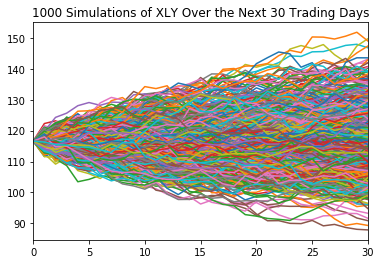

In [99]:
#plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLY Over the Next 30 Trading Days"
simulated_prices_XLY_df.plot(legend=None, title=plot_title)

In [100]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLY = simulated_prices_XLY_df.iloc[-1, :]
simulated_ending_prices_XLY.head()

Simulation 1    119.653133
Simulation 2    120.425534
Simulation 3    117.412510
Simulation 4    110.126096
Simulation 5    108.191889
Name: 30, dtype: float64

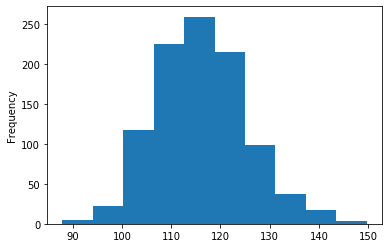

In [101]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_XLY.plot(kind='hist')

In [102]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_XLY.quantile(q=[0.025, 0.975])
confidence_interval

0.025     99.800010
0.975    136.815244
Name: 30, dtype: float64

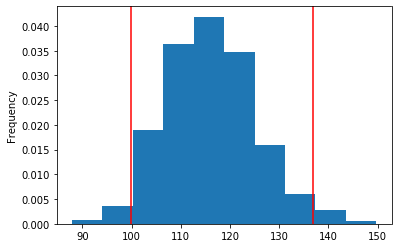

In [103]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_XLY.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [104]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - xly_last_price) / xly_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - xly_last_price) / xly_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in XLB"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in XLB over the next 30 trading days will end within in the range of $8559.18 and $11733.73


In [105]:
#START MONTE CARLO ANALYSIS XLP

# Calculate the mean of daily returns for XLP
avg_daily_return_xlp = concat_df.mean()['XLP_return']
print(f"The average daily return of XLP is {avg_daily_return_xlp}")

The average daily return of XLP is -0.00021915994464357484


In [106]:
#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLP from DataFrame

num_trading_days = 30
xlp_last_price = concat_df['XLP close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLP_df = pd.DataFrame()

In [107]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLP
    simulated_XLP_prices = [xlp_last_price]
    simulated_XLP_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLP_prices[-1] * (1 + np.random.normal(avg_daily_return_xlp, std_xlp_daily_returns))
        # Append the simulated price to the list
        simulated_XLP_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLP_df[f"Simulation {n+1}"] = pd.Series(simulated_XLP_prices)

simulated_prices_XLP_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,...,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000
1,58.806494,58.613672,57.729097,58.021157,58.505146,58.360117,57.134302,58.127463,58.548885,58.087981,...,58.163481,57.940376,58.404859,58.458189,57.653538,58.761637,58.375038,58.142684,58.336631,59.244504
2,58.512864,59.574387,58.137057,58.029826,58.879563,58.825095,57.543313,57.584262,57.787500,57.226796,...,57.472191,57.010369,59.359087,59.032162,58.235853,59.303600,58.592241,58.207150,58.729376,58.215596
3,58.899234,59.293074,58.290485,58.200403,59.653407,59.660743,57.510632,57.821522,57.118946,57.150782,...,57.408688,57.558624,59.783764,58.399302,57.224933,59.067510,58.185749,58.156013,57.790515,58.499821
4,58.482660,59.049802,59.212757,58.941143,60.242431,60.546923,58.017388,58.192881,55.592508,57.784091,...,57.764137,58.329213,59.998300,57.776080,56.697292,59.224703,57.918588,57.988466,57.658200,58.727444


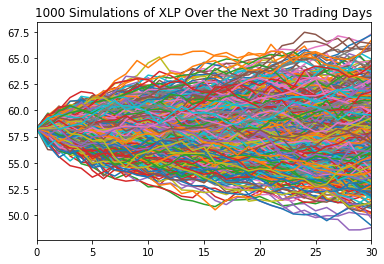

In [108]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLP Over the Next 30 Trading Days"
simulated_prices_XLP_df.plot(legend=None, title=plot_title)

In [111]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLP = simulated_prices_XLP_df.iloc[-1, :]
simulated_ending_prices_XLP.head()

Simulation 1    56.578205
Simulation 2    60.072578
Simulation 3    59.171107
Simulation 4    55.997317
Simulation 5    59.077107
Name: 30, dtype: float64